Q1. a

In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# Model parameters
beta = 0.99
kappa = 0.01
phi_pi = 2.5
sigma_n = 0.01
sigma_i = 0.001

# Simulation length
T = 5 #unsure if this was 5 quarters or 4*5 quarters- assuming the former

In [55]:
# Function to simulate the model
def simulate_model(eps_n, eps_i):
    y_hat = np.zeros(T)
    pi_hat = np.zeros(T)
    i_hat = np.zeros(T)
    r_hat = np.zeros(T)
    rn_hat = np.zeros(T)
    
    for t in range(1, T):
        # Expectations
        Et_y_hat_tp1 = y_hat[t-1]
        Et_pi_hat_tp1 = pi_hat[t-1]
        
        # Aggregate Demand
        y_hat[t] = Et_y_hat_tp1 - (i_hat[t-1] - Et_pi_hat_tp1 - eps_n[t])
        
        # New Keynesian Phillips Curve
        pi_hat[t] = beta * Et_pi_hat_tp1 + kappa * y_hat[t]
        
        # Taylor Rule
        i_hat[t] = phi_pi * pi_hat[t] + eps_i[t]
        
        # Real interest rate
        r_hat[t] = i_hat[t] - Et_pi_hat_tp1
        
        # Natural rate of interest
        rn_hat[t] = eps_n[t]
    
    return y_hat, pi_hat, i_hat, r_hat, rn_hat


In [56]:
# IRFs to natural rate shock (eps_n) with no monetary policy shock (eps_i)
eps_n_shock = np.random.randn(T) * sigma_n
eps_i_zero = np.zeros(T)
y_hat_n, pi_hat_n, i_hat_n, r_hat_n, rn_hat_n = simulate_model(eps_n_shock, eps_i_zero)

# IRFs to monetary policy shock (eps_i) with no natural rate shock (eps_n)
eps_n_zero = np.zeros(T)
eps_i_shock = np.random.randn(T) * sigma_i
y_hat_i, pi_hat_i, i_hat_i, r_hat_i, rn_hat_i = simulate_model(eps_n_zero, eps_i_shock)

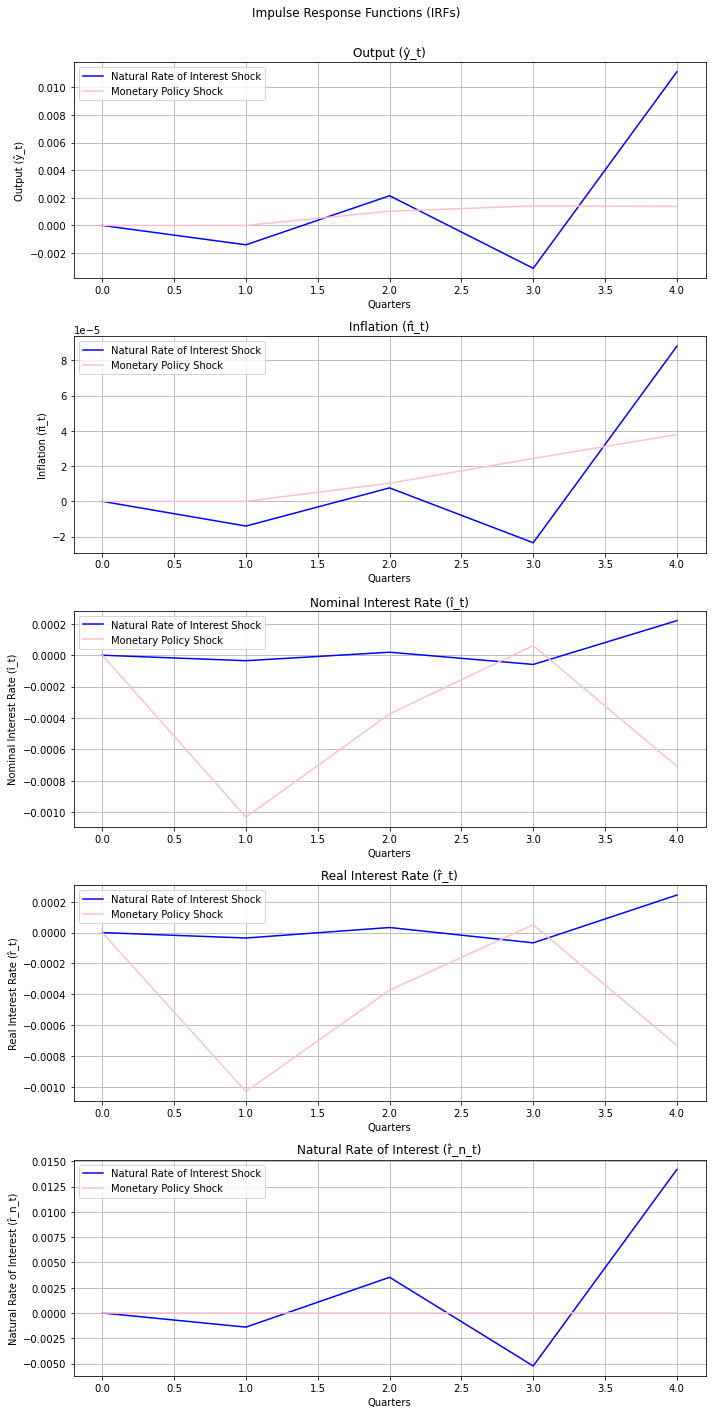

In [57]:
# Plot IRFs 
variables = {
    'Output (ŷ_t)': (y_hat_n, y_hat_i),
    'Inflation (π̂_t)': (pi_hat_n, pi_hat_i),
    'Nominal Interest Rate (î_t)': (i_hat_n, i_hat_i),
    'Real Interest Rate (r̂_t)': (r_hat_n, r_hat_i),
    'Natural Rate of Interest (r̂_n_t)': (rn_hat_n, rn_hat_i)
}

fig, axs = plt.subplots(len(variables), 1, figsize=(10, 20))
fig.suptitle('Impulse Response Functions (IRFs)')

colors = ['blue', 'pink']
labels = ['Natural Rate of Interest Shock', 'Monetary Policy Shock']

for i, (var_name, (response_n, response_i)) in enumerate(variables.items()):
    axs[i].plot(response_n, label=f'{labels[0]}', color=colors[0])
    axs[i].plot(response_i, label=f'{labels[1]}', color=colors[1])
    axs[i].set_title(var_name)
    axs[i].set_xlabel('Quarters')
    axs[i].set_ylabel(var_name)
    axs[i].legend()
    axs[i].grid(True)
    
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


(hoping my graphs are right, here's my interpration of parts b and c)



Q1.b. 

say the shock is an expansionary monetary policy which reduces nominal interest rate

1. Output ŷ : borrowing becomes less costly, which induces greater investment and consumption, thus causing agg 
demand (and by market clearing conditions) output to increase
2. Inflation π̂ : increase in consumption demand leads to higher prices as response to the demand pressure thus 
 increasing inflation 
3. Nominal Interest Rate î : As mentioned in the premise, increases as a result of the expansionary shock 
4. Real Interest Rate r̂ : this depends on the relative magnitude of rise in nominal interest rates and 
expected inflation, where if the latter increases more than the former, real interest rates could fall, 
which could stimulate further growth 


Q1.c. 

say there is an increase in the natural rate of interest

1. Output ŷ : It would increase cost of borrowing, consumption becomes more costly, agg demand and hence outputs falls
2. Inflation π̂ : lower agg demand drives down prices and hence inflation 
3. Nominal Interest Rate î : the central bank tries to induce economic growth by lowering nominal interest rate to offset impact of lower inflation 
4. Real Interest Rate r̂ : It would initially rise as a response to the shock, but eventualy would dpend on the difference in the magnitude of the depressed inflation rate and the bank's response in terms of lowered interest rates 

Q1.d. 

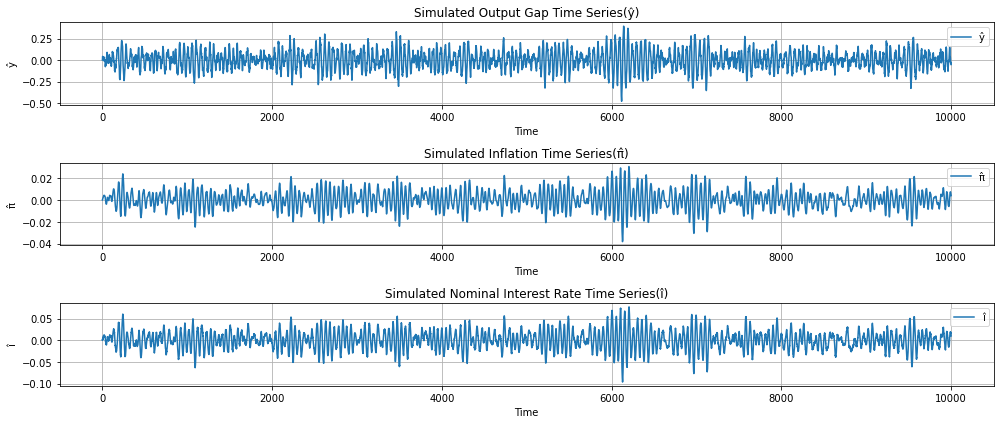

In [58]:
# Simulate a time series of length 10000
length = 10000
y_hat_series = np.zeros(length)
pi_hat_series = np.zeros(length)
i_hat_series = np.zeros(length)

rn_shock_series = np.random.normal(0, sigma_n, length)
i_shock_series = np.random.normal(0, sigma_i, length)

for t in range(1, length):
    y_hat_series[t] = beta * y_hat_series[t-1] - beta * (i_hat_series[t-1] - pi_hat_series[t-1] - rn_shock_series[t-1]) + rn_shock_series[t]
    pi_hat_series[t] = beta * pi_hat_series[t-1] + kappa * y_hat_series[t]
    i_hat_series[t] = phi_pi * pi_hat_series[t] + i_shock_series[t]

# Plotting the time series
plt.figure(figsize=(14, 6))
plt.subplot(3, 1, 1)
plt.plot(y_hat_series, label='ŷ')
plt.title('Simulated Output Gap Time Series(ŷ)')
plt.xlabel('Time')
plt.ylabel('ŷ')
plt.legend()
plt.grid(True)


plt.subplot(3, 1, 2)
plt.plot(pi_hat_series, label='π̂')
plt.title('Simulated Inflation Time Series(π̂)')
plt.xlabel('Time')
plt.ylabel('π̂')
plt.legend()
plt.grid(True)


plt.subplot(3, 1, 3)
plt.plot(i_hat_series, label='î')
plt.title('Simulated Nominal Interest Rate Time Series(î)')
plt.xlabel('Time')
plt.ylabel('î')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()




Q1.e. 

In [59]:
# Regression Analysis
import statsmodels.api as sm

y = y_hat_series
X = i_hat_series
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Perform the regression
model = sm.OLS(y, X).fit()
gamma_estimate = model.params[1]

print("Estimated value of gamma:", gamma_estimate)

Estimated value of gamma: 0.6978212280165014


Q1.f.

the nominal interest rate is endogeonous to the model, thus is influenced by both the policy shock as well as other shocks that affect output, thus violating the exogeniety assumption. Hence, gamma doesn't recover casual effect of monetrary shock on on output 


Q1.g.

yes, given that ῑ_t is exogenous to the model (by definition) that impacts nominal interest rate directly but output only through interest rates (refer to part b), we can use it through an IV approach as an instrument for î_t to establish causality. 


Q1.h.

as we established earlier, it is likely that output was affected by both shock to natural rate of interest as well as monetary policy. So if we can control for r̂_n_t, we are isolating the effect of the monetary policy shock on output (note these two shocks have no correlation by defition) 


Q1.i. 

A Cholesky decomposition could help identify monetary policy shock as the component of nominal int rate that is orthogonal to other shocks (by ordering in a VAR model). this identified shock then can be used as an instrument for nominal interest rate (attribute variation to exgenous policy action) that can now help establish causality


Q1.j. 

Using ῑ_t as an instrumnent for î_t would be the most reliable methodology as given the strong expgenoety assumption that is built with the IV estimation approach, which ensures that this isolates the impact of exogenous variation in the shock on output. 

Q1.k.

In [60]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS

In [61]:
# Prepare the data
y = y_hat_series
X = i_hat_series
Z = i_shock_series  # Instrument

# Add a constant term for the intercept
X = sm.add_constant(X)
Z = sm.add_constant(Z)


In [62]:
# Perform IV regression using 2SLS
iv_model = IV2SLS(y, X, instrument=Z)
iv_results = iv_model.fit()

gamma_iv_estimate = iv_results.params[1]
print(f'Estimated γ using IV: {gamma_iv_estimate}')


Estimated γ using IV: -0.5140841671446237


Q2 is answered on STATA as I had previously used it to answer a question using similar dataset for PS-2